# #INCOME_QUALIFICATION_PROJECT, MACHINE LEARNING BY
# #MOHAMMAD SAMEER UDDIN

In [1]:
import numpy as np                ### version:  1.18.2
import pandas as pd               ### version:  1.0.3
import matplotlib.pyplot as plt   ### version:  3.5.1 
import seaborn as sn              ### version:  1.0.3
import warnings
warnings.filterwarnings('ignore')

print(np.__version__)
import sklearn
print(sklearn.__version__)
print(pd.__version__)
print(sn.__version__)
import matplotlib
print(matplotlib.__version__)

1.18.2
0.24.2
1.1.5
0.11.2
3.5.1


# 1. Identify the output variable.

In [2]:
# Train and test datasets are saved as 'Train_income.csv', 'Test_income.csv' and read as shown below
df_train = pd.read_csv('Train_income.csv')
df_test = pd.read_csv('Test_income.csv')
# Clearly the ouput variable is 'Target' column only available in train data set
print(df_train.columns)
print(df_test.columns)

Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=143)
Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'age', 'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe',
       'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned',
       'agesq'],
      dtype='object', length=142)


# 2. Understand the type of data

In [3]:
df_train.head(3)
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB
None


In [5]:
df_train.isna().sum()

Id                    0
v2a1               6860
hacdor                0
rooms                 0
hacapo                0
                   ... 
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
agesq                 0
Target                0
Length: 143, dtype: int64

# 7. Count how many null values are existing in columns.

In [31]:
float_type_train = df_train.select_dtypes('float64')
print('null values for float type data in train set')
print(float_type_train.isna().sum())
print('null values for float type data in test set')
float_type_test = df_test.select_dtypes('float64')
print(float_type_test.isna().sum())

object_type_train = df_train.select_dtypes('object')
print('null values for object type data in train set')
print(object_type_train.isna().sum())
print('null values for object type data in test set')
object_type_test = df_test.select_dtypes('object')
print(object_type_test.isna().sum())

int_type_train = df_train.select_dtypes('int64')
print('null values for int type data in train set')
print(int_type_train.isna().sum())
print('null values for int type data in test set')
int_type_test = df_test.select_dtypes('int64')
print(int_type_test.isna().sum())

null values for float type data in train set
v2a1               6860
v18q1              7342
rez_esc            7928
meaneduc              5
overcrowding          0
SQBovercrowding       0
SQBdependency         0
SQBmeaned             5
dtype: int64
null values for float type data in test set
v2a1               17403
v18q1              18126
rez_esc            19653
meaneduc              31
overcrowding           0
SQBovercrowding        0
SQBdependency          0
SQBmeaned             31
dtype: int64
null values for object type data in train set
Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64
null values for object type data in test set
Id            0
idhogar       0
dependency    0
edjefe        0
edjefa        0
dtype: int64
null values for int type data in train set
hacdor            0
rooms             0
hacapo            0
v14a              0
refrig            0
                 ..
SQBhogar_total    0
SQBedjefe         0
SQBhogar_nin 

# #Missing values handling

In [32]:
columns = ['tipovivi1','tipovivi2','tipovivi3','tipovivi4','tipovivi5']

df_train.loc[df_train['v2a1'].isna(), columns].sum()

# clearly the one who owns the house would not pay the rent so lets fill na by 0 value

df_train['v2a1'].fillna(0, inplace = True)
df_test['v2a1'].fillna(0, inplace = True)
print('{} null values of column of v2a1 in train set'.format(df_train['v2a1'].isna().sum()))
print('{} null values of column of v2a1 in test set'.format(df_test['v2a1'].isna().sum()))

df_train['v2a1'].describe()

df_train['v2a1'].isna().sum()

# v18q  - Owns a talets
# v18q1 - no. of tablets own
# clearly if 7342 is not owned by any family then v18q1 value should be '0'
# let check first if v18q values to be 0 for no tablets owned and fill accordingly the value 0

print(df_train['v18q'].value_counts())

# there are 7342 families who doesnt hold a tablets so lets fill v18q1 by 0

df_train['v18q1'].fillna(0, inplace = True)
df_test['v18q1'].fillna(0, inplace = True)
print('{} null values of column of v18q1 in train set'.format(df_train['v18q1'].isna().sum()))
print('{} null values of column of v18q1 in test set'.format(df_test['v18q1'].isna().sum()))

# lets check the age which is no of years behind with and wihout the null values in rez_esc 

print(df_train[df_train['rez_esc'].notna()]['age'].describe())
print(df_train[df_train['rez_esc'].isna()]['age'].describe())

# Clearly if you see the count 1629(rez_esc without NA values) + 7928((rez_esc with NA values)) = 9557 but records are 9556
# Which means there is one such value with null rez_esc and also age range in between 7 and 17, which explains that there are no values inplace
# NA values which means we can fill tha NA with '0'
df_train[(df_train['age']>7)&(df_train['age']<17)&(df_train['rez_esc'].isna())]['age']

# The family ID: ID_f012e4242, with age btn 7 and 17 and rez_esc value null

df_train[(df_train['age'] ==10) & df_train['rez_esc'].isna()].head()

df_train[df_train['age'] ==10]['rez_esc'].unique()

df_train['rez_esc'].fillna(0, inplace = True)
df_test['rez_esc'].fillna(0, inplace = True)
print('{} null values of column of rez_esc in train set'.format(df_train['rez_esc'].isna().sum()))
print('{} null values of column of rez_esc in test set'.format(df_test['rez_esc'].isna().sum()))

## There are few columns ['dependency','edjefe','edjefa'] with mixed values to be cleaned

print(df_train['dependency'].unique())   # some categorical values also exists lets fill them

# From above we see that rest other type of values are either int or float type, lets make them float type using dictionary

filling_dic = {'yes':1, 'no':0}
for x in (df_train, df_test):
    x['dependency'] = x['dependency'].replace(filling_dic).astype(np.float64)
    x['edjefe'] = x['edjefe'].replace(filling_dic).astype(np.float64)
    x['edjefa'] = x['edjefa'].replace(filling_dic).astype(np.float64)

print('Dependency column with no mixed type data:', df_train['dependency'].unique())
print('edjefe column with no mixed type data:', df_train['edjefe'].unique())
print('edjefa column with no mixed type data:', df_train['edjefa'].unique())

# lets fill na values in 'meaneduc' column
# for that 'instlevel1' column is very relevant to mean education
# meaneduc,average years of education for adults (18+)
# instlevel1, =1 no level of education
# SQBmeaned, square of the mean years of education of adults (>=18) in the household
# 'instlevel1', if this columns values is 0 means no education which means no meaneduc and SQBmeaned as well.

df_train[df_train['meaneduc'].isna()]['instlevel1']

# clearly, meaneduc values in NA places should be 0

df_train['meaneduc'].fillna(0, inplace = True)
df_test['meaneduc'].fillna(0, inplace = True)
print('{} null values of column of meaneduc in train set'.format(df_train['meaneduc'].isna().sum()))
print('{} null values of column of meaneduc in test set'.format(df_test['meaneduc'].isna().sum()))

df_train['SQBmeaned'].fillna(0, inplace = True)
df_test['SQBmeaned'].fillna(0, inplace = True)
print('{} null values of column of SQBmeaned in train set'.format(df_train['SQBmeaned'].isna().sum()))
print('{} null values of column of SQBmeaned in test set'.format(df_test['SQBmeaned'].isna().sum()))

0 null values of column of v2a1 in train set
0 null values of column of v2a1 in test set
0    7342
1    2215
Name: v18q, dtype: int64
0 null values of column of v18q1 in train set
0 null values of column of v18q1 in test set
count    1629.000000
mean       12.258441
std         3.218325
min         7.000000
25%         9.000000
50%        12.000000
75%        15.000000
max        17.000000
Name: age, dtype: float64
count    7928.000000
mean       38.833249
std        20.989486
min         0.000000
25%        24.000000
50%        38.000000
75%        54.000000
max        97.000000
Name: age, dtype: float64
0 null values of column of rez_esc in train set
0 null values of column of rez_esc in test set
['no' '8' 'yes' '3' '.5' '.25' '2' '.66666669' '.33333334' '1.5'
 '.40000001' '.75' '1.25' '.2' '2.5' '1.2' '4' '1.3333334' '2.25'
 '.22222222' '5' '.83333331' '.80000001' '6' '3.5' '1.6666666' '.2857143'
 '1.75' '.71428573' '.16666667' '.60000002']
Dependency column with no mixed type data:

# 4. Check whether all members of the house have the same poverty level.

In [33]:
print('Total no of families are: {}'.format(len(df_train.groupby(['idhogar']))))

## Target columns are also having missing values to be filled as per the head poverty levels

# lets check the families with different target levels
family_target = df_train.groupby(['idhogar'], as_index=True)['Target'].apply(lambda x: x.nunique()==1)
same_target = family_target[family_target==True]
different_target = family_target[family_target==False]
print('There are {} familes whose members are having different poverty levels'.format(len(different_target)))

# lets looks at one as such
# parentesco1, 1 if household head
df_train[df_train['idhogar'] == different_target.index[1]][['idhogar','Target','parentesco1']]

family_with_and_without_head = df_train.groupby(['idhogar'])['parentesco1'].sum()
print(len(family_with_and_without_head))

family_with_and_without_head[0:5]

Total no of families are: 2988
There are 85 familes whose members are having different poverty levels
2988


idhogar
001ff74ca    1
003123ec2    1
004616164    1
004983866    1
005905417    1
Name: parentesco1, dtype: int64

# 5. Check if there is a house without a family head.

In [34]:
family_with_head = family_with_and_without_head[family_with_and_without_head==1]
family_without_head = family_with_and_without_head[family_with_and_without_head==0]
print('Households without a family head: {}'.format(len(family_without_head)))

family_without_head[0:5]

family_without_head = df_train.loc[df_train['idhogar']
                                   .isin(family_without_head.index), :]
print('The no of families without head are: {}'.format(len(family_without_head['idhogar'].unique())))

# Families without a head and Target value different are:

print('Families without a head and Target value are different are: {}'
      .format(family_without_head.groupby(['idhogar'])['Target']
      .apply(lambda x: x.nunique==1).any()))

Households without a family head: 15
The no of families without head are: 15
Families without a head and Target value are different are: False


# 6. Set poverty level of the members and the head of the house within a family.

In [35]:
for household in different_target.index:
    act_target = df_train.loc[(df_train['idhogar']==household)&(df_train['parentesco1']==1), 'Target']
    df_train.loc[(df_train['idhogar']==household),'Target'] = act_target

# Now lets check again the families with different target levels by repeating the same code  as earlier
family_target = df_train.groupby(['idhogar'], as_index=True)['Target'].apply(lambda x: x.nunique()==1)
same_target = family_target[family_target==True]
different_target = family_target[family_target==False]
print('There are {} familes whose members are having different poverty levels'.format(len(different_target)))

df_train.shape

There are 0 familes whose members are having different poverty levels


(9557, 143)

# 3. Check if there are any biases in your dataset.

1.0     723
2.0    1467
3.0    1138
4.0    5979
Name: Target, dtype: int64
1.0     222
2.0     442
3.0     355
4.0    1954
Name: Target, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


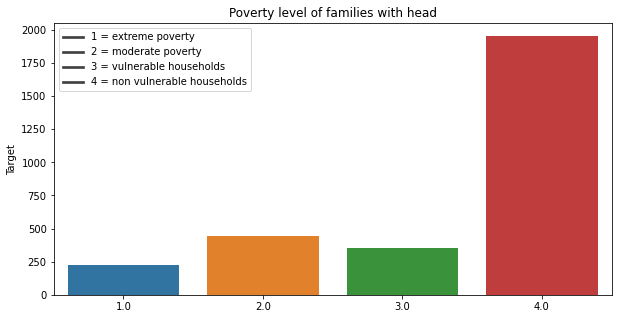

(9557, 143)
(9557, 128)
(23856, 127)


In [36]:
print(df_train['Target'].value_counts().sort_index())

target_heads = df_train.loc[(df_train['parentesco1']==1)&df_train['Target']]

print(target_heads['Target'].value_counts().sort_index())

## 1 = extreme poverty, 2 = moderate poverty, 3 = vulnerable households, 4 = non vulnerable households
plt.figure(figsize = (10,5))
print(sn.barplot(target_heads['Target'].value_counts().index, target_heads['Target'].value_counts()))
plt.legend(labels=["1 = extreme poverty", "2 = moderate poverty","3 = vulnerable households","4 = non vulnerable households"]
           , loc ="upper left")
plt.title('Poverty level of families with head')
plt.show()

## clearly the data seems to be unbalnced, i.e., biased

## lets look at the columns which are not necessary and also drop them off from the datasets
## clearly the squared columns are no really necessary as we dont have the negative values in any of the features so:
## ['SQBescolari','SQBage', 'SQBhogar_total','SQBedjefe','SQBhogar_nin','SQBovercrowding','SQBdependency','SQBmeaned','agesq']
## and the unique values for the identity purposes like 
## ['Id', 'idhogar'] are not even necessary since to avoid extra features
## and look at the area1 and area2 there columns are representonf urban and rural areas so one is sufficient to define them so ## lets remove area2 only cause it also has values 2 those donot signifies.
## ['tamhog', 'tamviv','r4t3'], since, hogar_total, 'tamviv', 'r4t3' represents the same so one os enough & 'hhsize', 'tamhog'
## are the same and one is enough

print(df_train.shape)

drop_columns = ['Id', 'idhogar','SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq','area2','tamhog', 'tamviv','r4t3']
for x in (df_train, df_test):
    x.drop(columns=drop_columns, inplace = True)

print(df_train.shape)
print(df_test.shape)

# 8. Remove null value rows of the target variable.

In [37]:
# Before this we have few null values in Target columns, so we need to drop them
print('The size of train set before dropping rows with Target with NA: {}'.format(df_train.shape))
df_train.dropna(axis = 0, inplace = True)
print('The size of train set after dropping rows with Target with NA: {}'.format(df_train.shape))

from sklearn.model_selection import train_test_split
x = df_train.drop(['Target'], axis = 1)
y = df_train['Target']

xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size = 0.75,random_state = 2)

The size of train set before dropping rows with Target with NA: (9557, 128)
The size of train set after dropping rows with Target with NA: (9307, 128)


In [38]:
print('Size of the x_features train dataset is {}'.format(xtrain.shape))
print('Size of the x_features test dataset is {}'.format(xtest.shape))
print('Size of the y_feature train dataset is {}'.format(ytrain.shape))
print('Size of the y_feature test dataset is {}'.format(ytest.shape))

Size of the x_features train dataset is (6980, 127)
Size of the x_features test dataset is (2327, 127)
Size of the y_feature train dataset is (6980,)
Size of the y_feature test dataset is (2327,)


# 9. Predict the accuracy using random forest classifier.

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_rfc = RandomForestClassifier()

model_rfc.fit(xtrain,ytrain)

ytrainpred = model_rfc.predict(xtrain)

from sklearn.metrics import accuracy_score, confusion_matrix

ytestpred = model_rfc.predict(xtest)

print('Accuracy Score after fitting a RandomForestClassifier: {} %'.format(accuracy_score(ytestpred,ytest)*100))

print('confusion_matrix for the model:\n {}'.format(confusion_matrix(ytestpred,ytest)))

y_test_prediction = model_rfc.predict(df_test)

df_test['Target'] = y_test_prediction

## writing the dataset with the prediction on test set
## df_test.to_csv('Income_Qualification_Poverty_predictions.csv')

Accuracy Score after fitting a RandomForestClassifier: 92.60850880962613 %
confusion_matrix for the model:
 [[ 147    1    0    0]
 [   1  288    5    5]
 [   2    1  196    1]
 [  29   58   69 1524]]


# 10. Check the accuracy using random forest with cross validation.

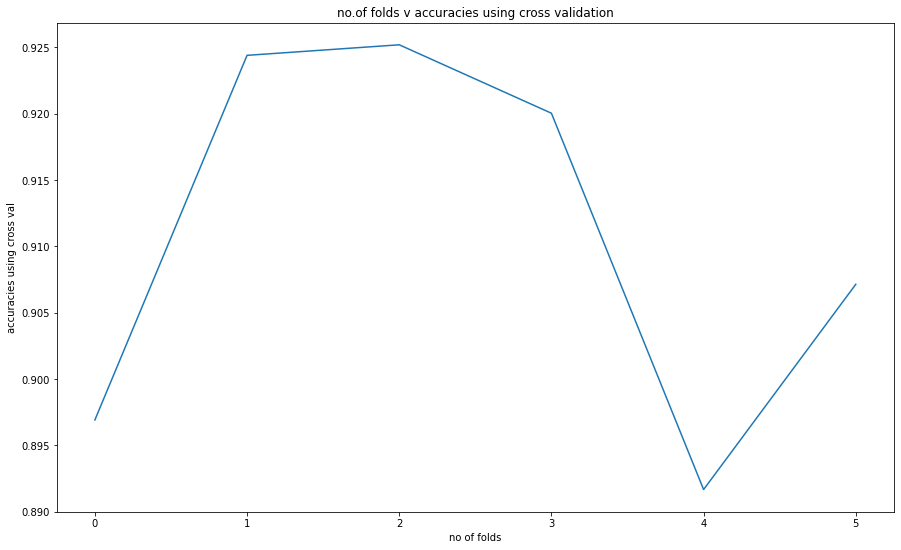

mean accuracy is attained for 6 no. of folds is: 91.08883195984632 %


In [40]:
from sklearn.model_selection import KFold, cross_val_score
kfolds = KFold(n_splits = 6)
outcomes = cross_val_score(model_rfc, xtrain,ytrain,cv=kfolds)
plt.figure(figsize = (15,9))
plt.plot(outcomes)
plt.title("no.of folds v accuracies using cross validation")
plt.xlabel('no of folds')
plt.ylabel('accuracies using cross val')
plt.show()
print('mean accuracy is attained for 6 no. of folds is: {} %'.format(np.mean(outcomes)*100))